In [ ]:
!pip install Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 943 kB/s 
     |████████████████████████████████| 49 kB 4.0 MB/s 
     |████████████████████████████████| 45 kB 2.7 MB/s 
  Created wheel for Prophet: filename=prophet-1.0.1-py3-none-any.whl size=6641274 sha256=12627159e95fb0787d3c5052a3e2f7c5d253246197cd2554fd7603b080bf7c49
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built Prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
from prophet import Prophet
from pandas.tseries.offsets import MonthEnd
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
data_url ="https://raw.githubusercontent.com/Coresight-Adithya/Automated-Projections/main/Aus%20grocery/Australian%20Grocery%20-2022.csv" 
data_name = "Astralian Grocery"
df = pd.read_csv(data_url)
print(df)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') + MonthEnd(1)
df.columns = ['ds', 'y']
df['y'] = df['y'].astype(float)
df = df.dropna()

           Date   Sales 
0    01-04-1982    933.4
1    01-05-1982    920.5
2    01-06-1982    933.6
3    01-07-1982    972.6
4    01-08-1982    923.5
..          ...      ...
476  01-12-2021  11902.9
477  01-01-2022  11136.9
478  01-02-2022   9874.3
479  01-03-2022  10862.1
480  01-04-2022  10753.6

[481 rows x 2 columns]


In [ ]:
# COVID Outliers
covid_outlier_st = datetime.strptime('2020-03-31', '%Y-%m-%d').date()
covid_outlier_en = datetime.strptime('2020-05-31', '%Y-%m-%d').date()

df.loc[(df['ds'].dt.date >= covid_outlier_st) & (df['ds'].dt.date <= covid_outlier_en), 'y'] = None

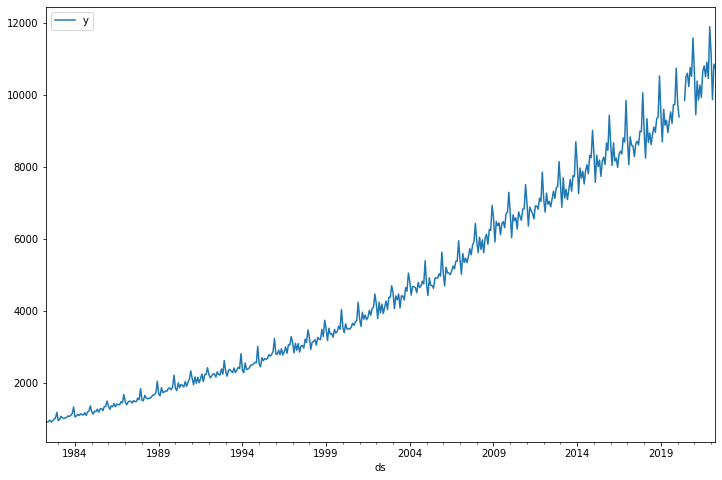

In [ ]:
df.plot(x='ds', y='y', figsize=(12,8))

In [ ]:
# Facebook Prophet Model
model = Prophet(seasonality_mode='multiplicative', daily_seasonality=False, weekly_seasonality=False)
model.fit(df)

In [ ]:
# Make future dates
future = model.make_future_dataframe(periods=68, freq='M')
future = future[future['ds'].dt.year <= datetime.now().year+6]
future

,ds
0,1982-04-30
1,1982-05-31
2,1982-06-30
3,1982-07-31
4,1982-08-31
...,...
544,2027-08-31
545,2027-09-30
546,2027-10-31
547,2027-11-30


In [ ]:
# Forecast
forecast = model.predict(future)

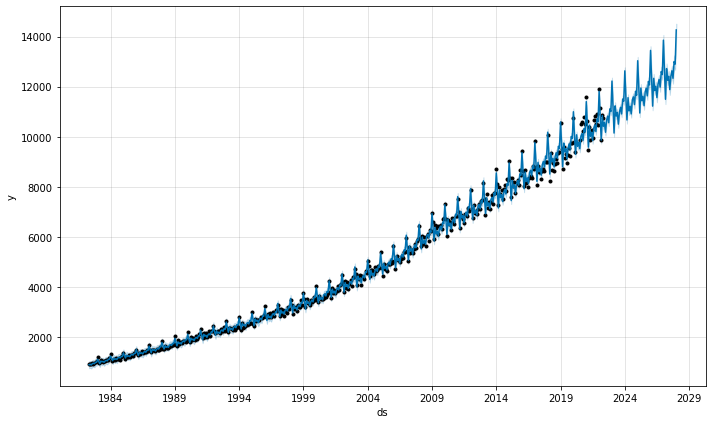

In [ ]:
model.plot(forecast);

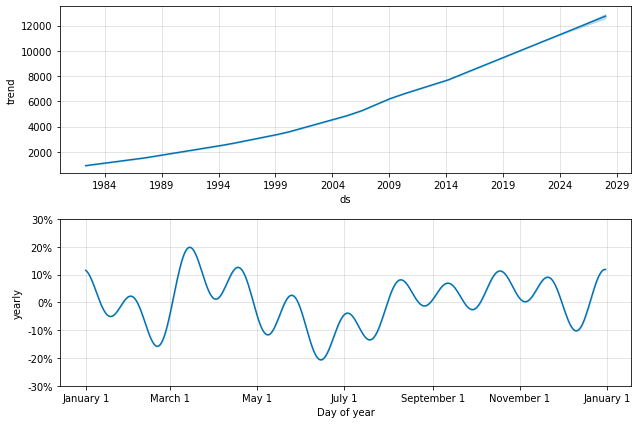

In [ ]:
model.plot_components(forecast);

In [ ]:
data_name = "Australian Grocery"
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].to_csv(data_name+'-Prophet-Predictions.csv')